<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X, y = data.iloc[:, [0, 2]], iris.target

X.shape, y.shape

((150, 2), (150,))

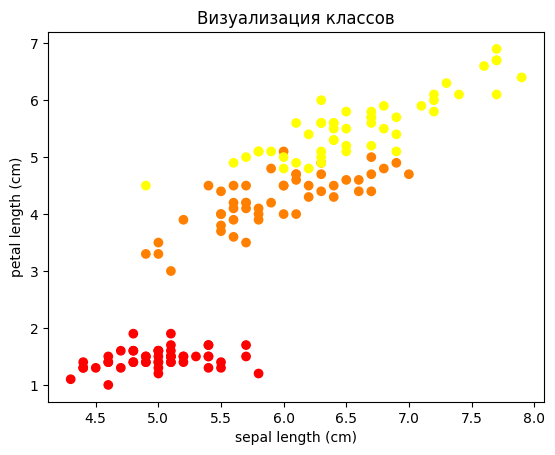

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

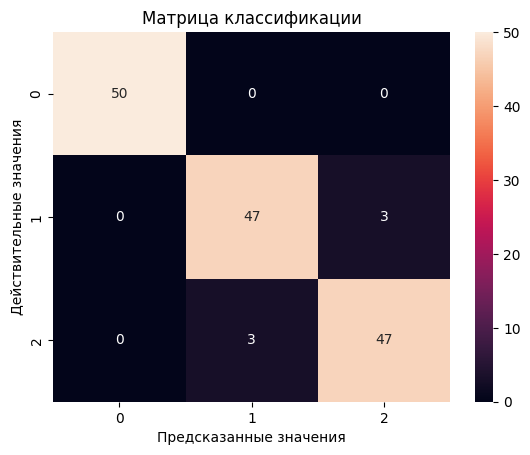

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [19]:
y_pred = knn.predict(X_scaled)

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print(classification_report(y_pred, y))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


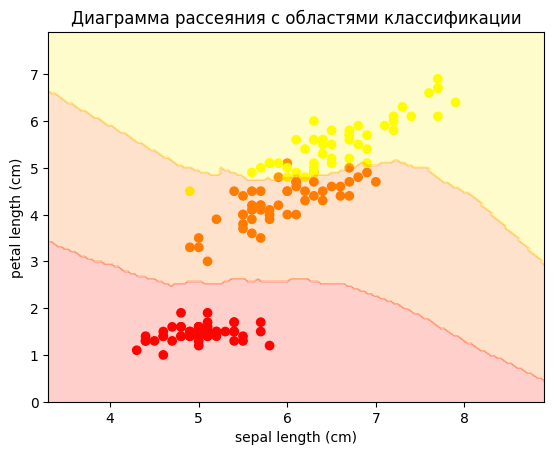

In [20]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [23]:
observation_new = [[5.5, 5]]

observation_new_scaled = scaler.transform(observation_new)
predictions = knn.predict(observation_new_scaled)
probabilities = knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)

print("Предсказанная метка:", predictions)
print("Предсказанные вероятности:", probabilities)
print("Расстояния до ближайших соседей:", distances)
print("Индексы ближайших соседей:", indices)

Предсказанная метка: [2]
Предсказанные вероятности: [[0. 0. 1.]]
Расстояния до ближайших соседей: [[0.03254042 0.05555556 0.08503951]]
Индексы ближайших соседей: [[121 113 114]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


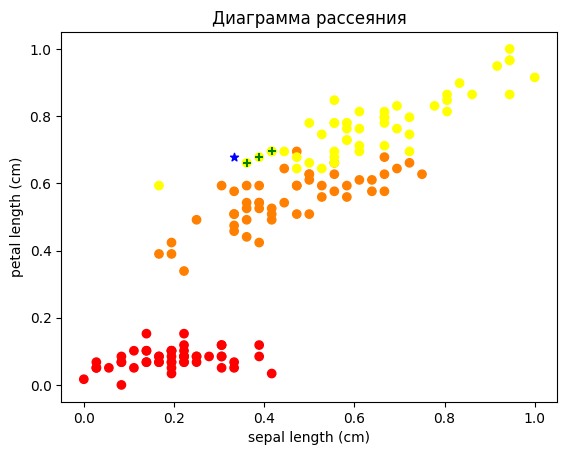

In [27]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

for i in range(len(indices[0])):
    plt.scatter(X_scaled[indices[0][i]][0], X_scaled[indices[0][i]][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Доп задание

<ipython-input-28-3a7397fc64fc>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(X.iloc[indices[0][i]][0], X.iloc[indices[0][i]][1], marker='+', color='g')


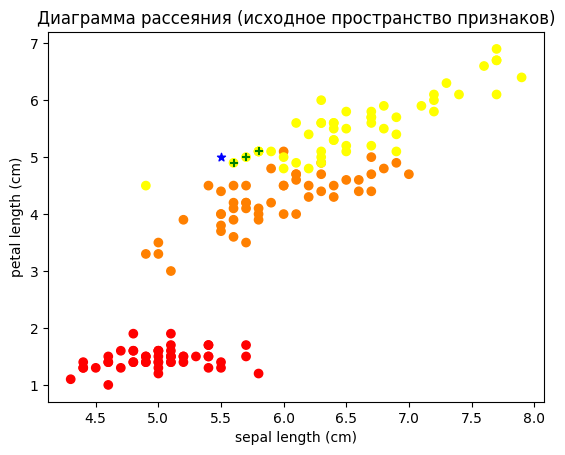

In [28]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

for i in range(len(indices[0])):
    plt.scatter(X.iloc[indices[0][i]][0], X.iloc[indices[0][i]][1], marker='+', color='g')

plt.title("Диаграмма рассеяния (исходное пространство признаков)")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

k = 1, Accuracy = 0.99


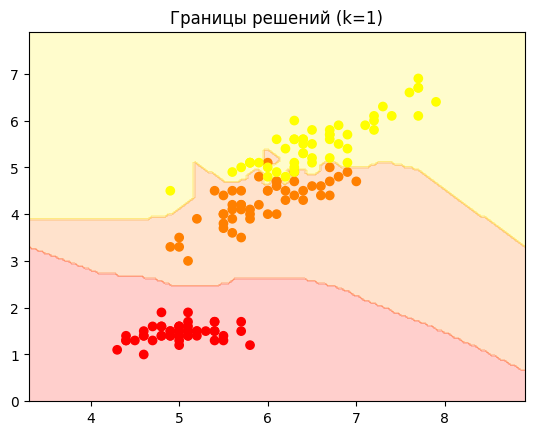

k = 3, Accuracy = 0.96


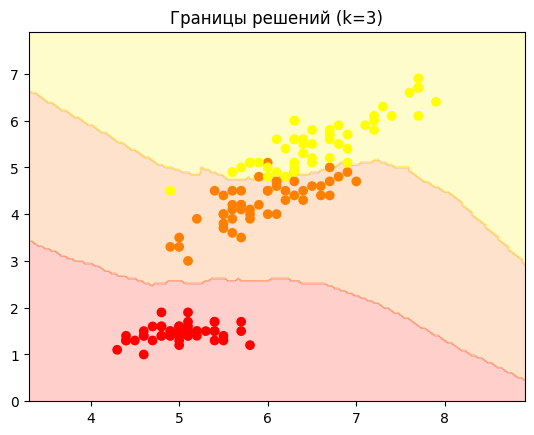

k = 5, Accuracy = 0.95


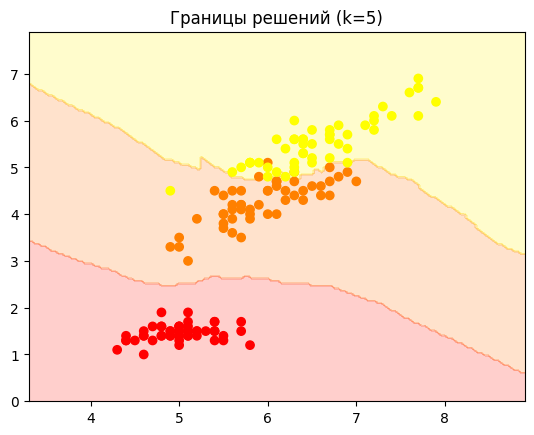

k = 10, Accuracy = 0.94


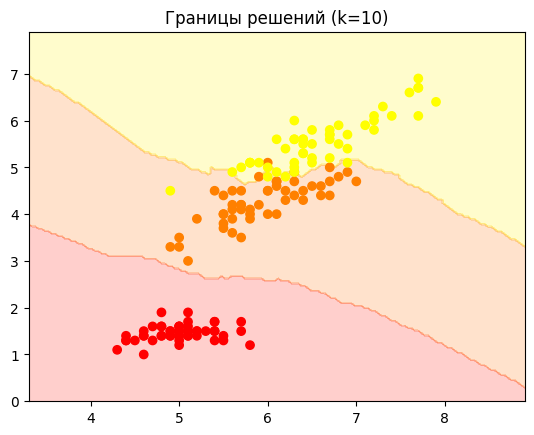

In [37]:
k_values = [1, 3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    print(f"k = {k}, Accuracy = {accuracy_score(y, y_pred):.2f}")

    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.title(f"Границы решений (k={k})")
    plt.show()

In [32]:
observation_new_shifted = [[7, 6]]

observation_new_shifted_scaled = scaler.transform(observation_new_shifted)
predictions_shifted = knn.predict(observation_new_shifted_scaled)
probabilities_shifted = knn.predict_proba(observation_new_shifted_scaled)
distances_shifted, indices_shifted = knn.kneighbors(observation_new_shifted_scaled)

print("Предсказанная метка для сдвинутого наблюдения:", predictions_shifted)
print("Предсказанные вероятности для сдвинутого наблюдения:", probabilities_shifted)
print("Расстояния до ближайших соседей для сдвинутого наблюдения:", distances_shifted)
print("Индексы ближайших соседей для сдвинутого наблюдения:", indices_shifted)


Предсказанная метка для сдвинутого наблюдения: [2]
Предсказанные вероятности для сдвинутого наблюдения: [[0. 0. 1.]]
Расстояния до ближайших соседей для сдвинутого наблюдения: [[0.03254042 0.05555556 0.05794022]]
Индексы ближайших соседей для сдвинутого наблюдения: [[102 125 120]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


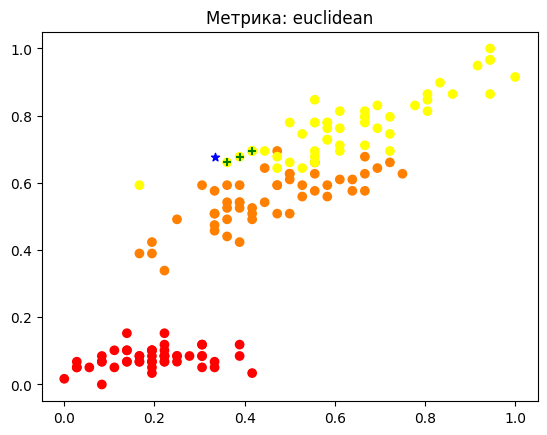

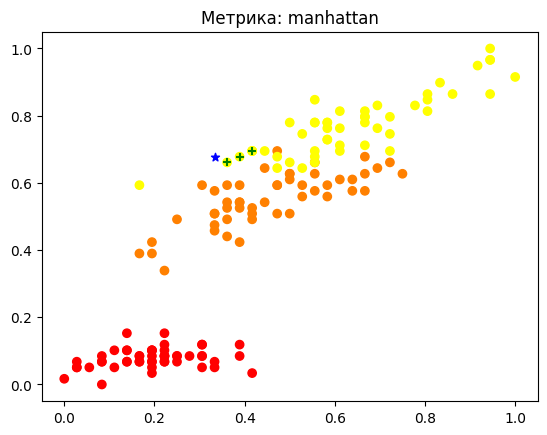

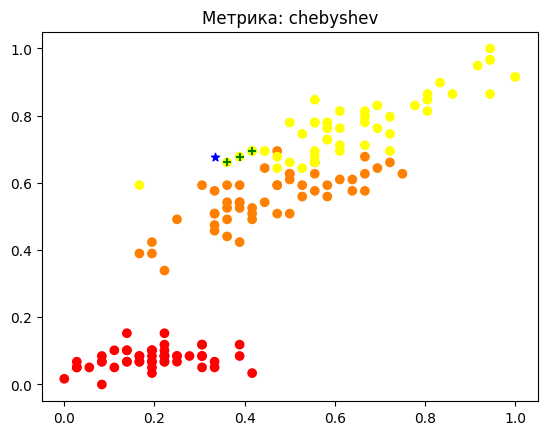

In [46]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    distances, indices = knn.kneighbors(observation_new_scaled)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')
    for i in indices[0]:
        plt.scatter(X_scaled[i, 0], X_scaled[i, 1], marker='+', color='g')
    plt.title(f"Метрика: {metric}")
    plt.show()

In [47]:
X_full = iris.data
scaler_full = MinMaxScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_full_scaled, y)
    y_pred = knn.predict(X_full_scaled)
    print(f"Полный датасет, k={k}, Accuracy: {accuracy_score(y, y_pred):.2f}")

Полный датасет, k=3, Accuracy: 0.97
Полный датасет, k=5, Accuracy: 0.96
Полный датасет, k=7, Accuracy: 0.97


In [48]:
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_uniform.fit(X_full_scaled, y)
knn_distance.fit(X_full_scaled, y)

print("Uniform accuracy:", knn_uniform.score(X_full_scaled, y))
print("Distance-weighted accuracy:", knn_distance.score(X_full_scaled, y))

Uniform accuracy: 0.9666666666666667
Distance-weighted accuracy: 1.0


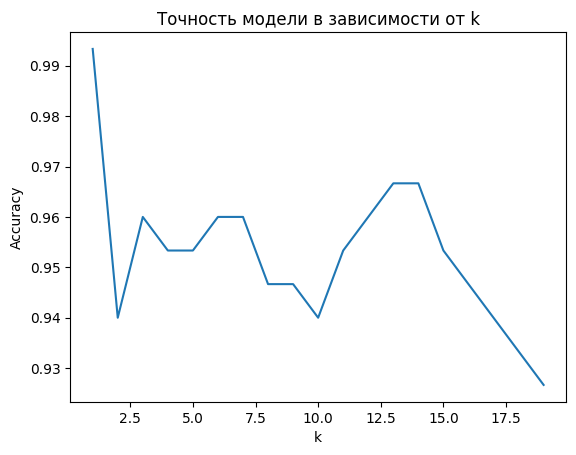

In [49]:
accuracies = []
k_range = range(1, 20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    accuracies.append(knn.score(X_scaled, y))

plt.plot(k_range, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Точность модели в зависимости от k")
plt.show()

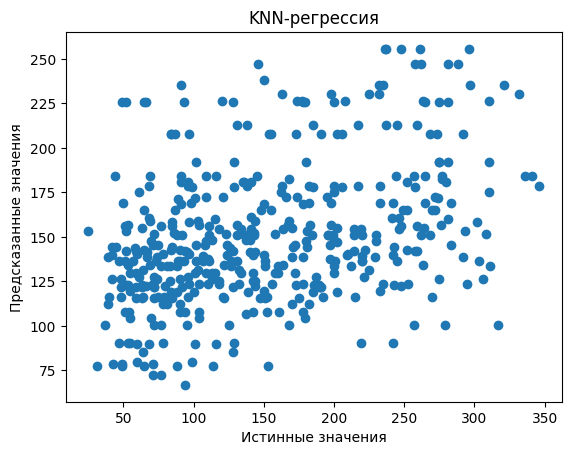

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes

data = load_diabetes()
X_reg, y_reg = data.data[:, :2], data.target  # Используем 2 признака для простоты

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg, y_reg)
y_pred = knn_reg.predict(X_reg)

plt.scatter(y_reg, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("KNN-регрессия")
plt.show()